<a href="https://colab.research.google.com/github/Katyusha47/uts-statistika/blob/main/UTS_Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Statistika

Studi Kasus:
Anda adalah seorang analis data di sebuah perusahaan ritel yang menjual berbagai produk teknologi. Perusahaan Anda ingin mengetahui tren penjualan untuk memperbaiki strategi pemasaran dan produksi. Anda diberi akses ke database penjualan perusahaan yang mencakup data transaksi selama dua tahun terakhir. Variabel yang tersedia:
1.	Tanggal Transaksi
2.	Produk ID
3.	Kategori Produk (Elektronik, Komputer, Aksesoris, dll.)
4.	Harga Satuan
5.	Jumlah Unit Terjual
6.	Lokasi Toko

Soal:
1.	Buatlah data sintesis untuk setiap variabel (minimal data 50 entri)
2.	Identifikasi dan klasifikasikan atribut data yang termasuk dalam tipe data kualitatif dan kuantitatif
3.	Jelaskan pentingnya membedakan anatara data populasi dan data sample dalam konteks analisis data.
4.	Hitunglah ukuran pemusatan (rata-rata, median) dan ukuran penyebaran (variansi, standar deviasi) untuk data harga satuan dan jumlah unit terjual.
5.	Buatlah box plot untuk visualisasi distribusi harga satuan per kategori produk
6.	Pilihlah metode sampling yang paling sesuai untuk memperkirakan penjualan bulanan dan jelaskan alasan pemilihan metode tersebut
7.	Berdasarkan sampel yang Anda ambil, estimasikan rata-rata penjualan bulanan per kategori produk menggunakan interval kepercayaan 95%.
8.	Diskusikan bagaimana konsep big data bisa diintegrasikan dalam analisis ini untuk mendapatkan wawasan yang lebih mendalam.
9.	Berikan contoh hipotetis bagaimana analisis big data dapat membantu mengidentifikasi tren penjualan yang tidak terlihat hanya dari analisis sampel.



#Jawabannya

###Nomor 1-3 ada di gdocs

4.	Hitunglah ukuran pemusatan (rata-rata, median) dan ukuran penyebaran (variansi, standar deviasi) untuk data harga satuan dan jumlah unit terjual.

In [10]:
import pandas as pd

data = pd.read_csv('datanya.csv')

# Calculate measures of central tendency and dispersion for 'Harga Satuan (Rp)'
harga_mean = data['Harga Satuan (Rp)'].mean()
harga_median = data['Harga Satuan (Rp)'].median()
harga_variance = data['Harga Satuan (Rp)'].var()
harga_std_dev = data['Harga Satuan (Rp)'].std()

# Calculate measures of central tendency and dispersion for 'Jumlah Unit Terjual'
jumlah_mean = data['Jumlah Unit Terjual'].mean()
jumlah_median = data['Jumlah Unit Terjual'].median()
jumlah_variance = data['Jumlah Unit Terjual'].var()
jumlah_std_dev = data['Jumlah Unit Terjual'].std()

# Create a DataFrame for the results
results = pd.DataFrame({
    "Statistik": ["Rata-rata", "Median", "Variansi", "Standar Deviasi"],
    "Harga Satuan (Rp)": [harga_mean, harga_median, harga_variance, harga_std_dev],
    "Jumlah Unit Terjual": [jumlah_mean, jumlah_median, jumlah_variance, jumlah_std_dev]
})

# Display the results in a table
results


,Statistik,Harga Satuan (Rp),Jumlah Unit Terjual
0,Rata-rata,2.326384e+06,28.740000
1,Median,1.170086e+06,24.500000
2,Variansi,6.054278e+12,256.400408
3,Standar Deviasi,2.460544e+06,16.012508


5.	Buatlah box plot untuk visualisasi distribusi harga satuan per kategori produk

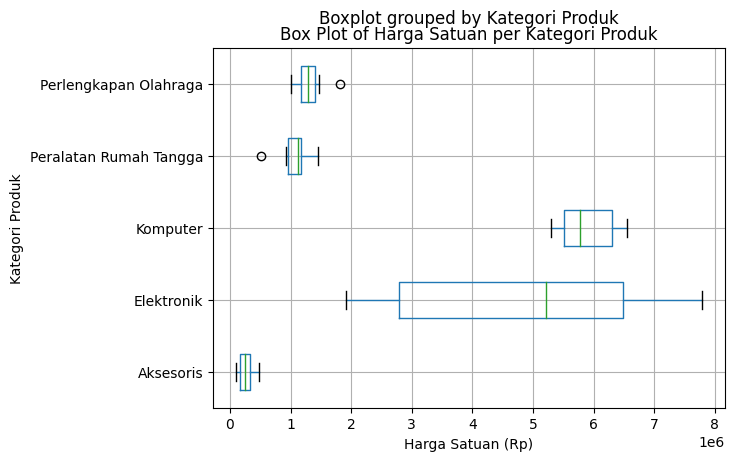

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('datanya.csv')

# Create box plots for 'Harga Satuan' per category
data.boxplot(by='Kategori Produk', column='Harga Satuan (Rp)', grid=True, vert=False)
plt.xlabel('Harga Satuan (Rp)')
plt.ylabel('Kategori Produk')
plt.title('Box Plot of Harga Satuan per Kategori Produk')
plt.show()


6.	Pilihlah metode sampling yang paling sesuai untuk memperkirakan penjualan bulanan dan jelaskan alasan pemilihan metode tersebut (Jawabannya ada di gdocs)

7.	Berdasarkan sampel yang Anda ambil, estimasikan rata-rata penjualan bulanan per kategori produk menggunakan interval kepercayaan 95%.

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv('datanya.csv')

data['Tanggal Transaksi'] = pd.to_datetime(data['Tanggal Transaksi'])

data['YearMonth'] = data['Tanggal Transaksi'].dt.to_period('M')

grouped_data = data.groupby(['Kategori Produk', 'YearMonth'])['Jumlah Unit Terjual'].sum().reset_index()

# Calculate monthly average sales per category
monthly_avg_sales = grouped_data.groupby('Kategori Produk')['Jumlah Unit Terjual'].mean().reset_index()

# Calculate standard error of the mean
monthly_avg_sales['SEM'] = grouped_data.groupby('Kategori Produk')['Jumlah Unit Terjual'].sem().values

# Define the z-score for a 95% confidence interval
z_score = stats.norm.ppf(0.975)

# Calculate the 95% confidence intervals
monthly_avg_sales['Lower'] = monthly_avg_sales['Jumlah Unit Terjual'] - z_score * monthly_avg_sales['SEM']
monthly_avg_sales['Upper'] = monthly_avg_sales['Jumlah Unit Terjual'] + z_score * monthly_avg_sales['SEM']

# Display the result in a table
monthly_avg_sales = monthly_avg_sales.rename(columns={
    'Kategori Produk': 'Kategori Produk',
    'Jumlah Unit Terjual': 'Rata-rata Penjualan Bulanan'
})

monthly_avg_sales['Rata-rata Penjualan Bulanan'] = monthly_avg_sales['Rata-rata Penjualan Bulanan'].map('{:.2f}'.format)
monthly_avg_sales['Lower'] = monthly_avg_sales['Lower'].map('{:.2f}'.format)
monthly_avg_sales['Upper'] = monthly_avg_sales['Upper'].map('{:.2f}'.format)

monthly_avg_sales


,Kategori Produk,Rata-rata Penjualan Bulanan,SEM,Lower,Upper
0,Aksesoris,39.91,5.348669,29.43,50.39
1,Elektronik,30.25,4.951469,20.55,39.95
2,Komputer,34.00,4.898979,24.40,43.60
3,Peralatan Rumah Tangga,20.67,2.581989,15.61,25.73
4,Perlengkapan Olahraga,39.86,7.427198,25.30,54.41


Nomor 8 dan 9 ada di gdocs